In [1]:
import keras
loaded_model = keras.models.load_model('VGG16_transfer_learning_animals10.h5')


In [3]:
loaded_model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [4]:
import tensorflow as tf
assert tf.__version__.startswith('2')

from mini_lucid_tf2 import objectives, transformations, render


obj = objectives.GramCosSim(loaded_model, 'block5_conv3')
print(obj)
_ = render.render_vis(obj, 224,steps=(10,))

Step 200


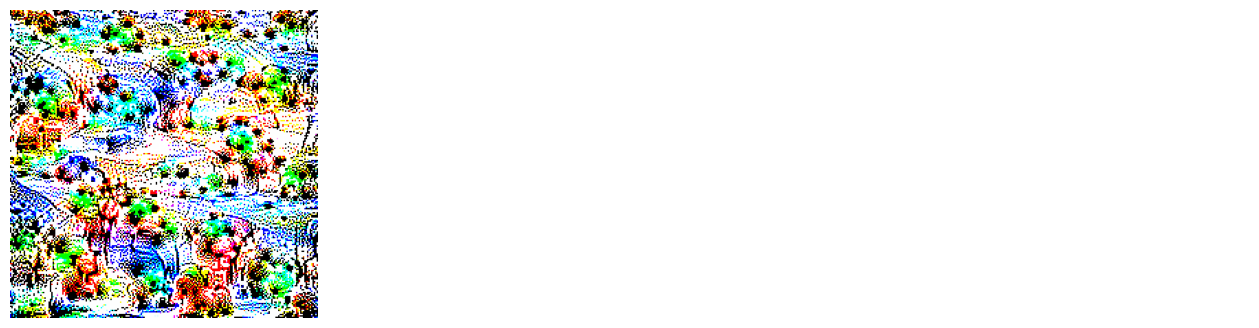

In [72]:
obj = objectives.Channel(model_test, 'block5_conv3',500)
print(obj)
_ = render.render_vis(obj, 224,steps=(200,))

In [ ]:
import tensorflow as tf
assert tf.__version__.startswith('2')

from mini_lucid_tf2 import objectives, transformations, render


obj = objectives.GramCosSim(model_test, 'block3_conv3')
print(obj)


In [49]:
classes_dictionary = train_data.class_indices

In [22]:
feature_extractor_layer = hub.KerasLayer(efficientnet_url,
                                           trainable=False, 
                                           name='feature_extraction_layer',
                                           input_shape=(224, 224, 3))

efficientnet_model = tf.keras.Sequential([
    feature_extractor_layer, 
    layers.Dense(10, activation='softmax', name='output_layer')  
  ])

In [23]:
efficientnet_model.compile(loss='categorical_crossentropy',
                     optimizer=tf.keras.optimizers.Adam(),
                     metrics=['accuracy'])

In [25]:
efficientnet_model_history = efficientnet_model.fit(train_data, 
                        epochs=10,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data)

Epoch 1/10
655/655 [==============================] - 2003s 3s/step - loss: 0.3891 - accuracy: 0.8928 - val_loss: 0.2379 - val_accuracy: 0.9281
Epoch 2/10
655/655 [==============================] - 1764s 3s/step - loss: 0.2094 - accuracy: 0.9348 - val_loss: 0.2021 - val_accuracy: 0.9343
Epoch 3/10
655/655 [==============================] - 1680s 3s/step - loss: 0.1847 - accuracy: 0.9428 - val_loss: 0.1958 - val_accuracy: 0.9407
Epoch 4/10
655/655 [==============================] - 1513s 2s/step - loss: 0.1704 - accuracy: 0.9464 - val_loss: 0.1860 - val_accuracy: 0.9421
Epoch 5/10
655/655 [==============================] - 1865s 3s/step - loss: 0.1548 - accuracy: 0.9513 - val_loss: 0.1881 - val_accuracy: 0.9396
Epoch 6/10
655/655 [==============================] - 2162s 3s/step - loss: 0.1467 - accuracy: 0.9536 - val_loss: 0.1919 - val_accuracy: 0.9390
Epoch 7/10
655/655 [==============================] - 1914s 3s/step - loss: 0.1376 - accuracy: 0.9570 - val_loss: 0.1795 - val_accuracy:

In [34]:
efficientnet_model_history.model.save('animals_10_transferlearning_efficientnet.h5')

In [83]:
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras import layers
import tensorflow_hub as hub

# Define the custom object scope
custom_objects = {
    'KerasLayer': hub.KerasLayer
}

# Load the model
modelqqqq = load_model('animals_10_transferlearning_efficientnet.h5', custom_objects=custom_objects)


TypeError: weight_decay is not a valid argument, kwargs should be empty  for `optimizer_experimental.Optimizer`.

In [47]:
from PIL import Image
import numpy as np

# Load and resize the image
image = Image.open('elephant2.jpg')
image = image.resize((224, 224))

# Convert the image to a numpy array
image_array = np.array(image)

# Normalize the pixel values
image_array = image_array / 255.0

# Expand dimensions to match the model input shape
input_image = np.expand_dims(image_array, axis=0)


In [59]:
# Make the prediction
prediction = model.predict(input_image)

# Get the predicted class label
predicted_class = np.argmax(prediction)
animal_name = get_key_by_value(classes_dictionary, predicted_class)
# Print the predicted class label
print("Predicted class:", animal_name)


1/1 [==============================] - 0s 123ms/step
Predicted class: elephant


In [58]:
def get_keys_by_value(dictionary, value):
    return [key for key, val in dictionary.items() if val == value]



In [32]:
import tensorflow as tf
assert tf.__version__.startswith('2')

from mini_lucid_tf2 import objectives, transformations, render

In [30]:
model.keras_api.variables

ListWrapper([<tf.Variable 'efficientnetv2-b0/blocks_0/conv2d/kernel:0' shape=(3, 3, 32, 16) dtype=float32, numpy=
array([[[[-1.00208251e-02, -9.76230726e-02, -1.03572346e-01, ...,
           6.83434010e-02, -9.27658379e-02, -2.81381942e-02],
         [-3.75655033e-02, -5.48017561e-01, -5.66359684e-02, ...,
           2.54087592e-03, -2.32936874e-01,  1.45088192e-02],
         [-2.06300206e-02, -3.94571871e-01, -1.17480762e-01, ...,
           1.68354958e-02,  1.37243807e-01, -3.75802398e-01],
         ...,
         [-1.77918840e-02,  3.42421502e-01, -2.45684549e-01, ...,
          -3.04920366e-03, -1.57090388e-02,  2.82508194e-01],
         [ 3.89756076e-02, -1.04206055e-01, -1.61297441e-01, ...,
          -8.64439905e-02, -2.24101961e-01, -8.35027695e-02],
         [ 8.84641334e-02, -2.60541350e-01,  1.44419834e-01, ...,
          -2.67723858e-01,  1.89969540e-01, -2.66337305e-01]],

        [[-5.80069236e-02,  1.94894262e-02,  9.41956639e-02, ...,
          -8.78865793e-02,  7.145020

Step 200


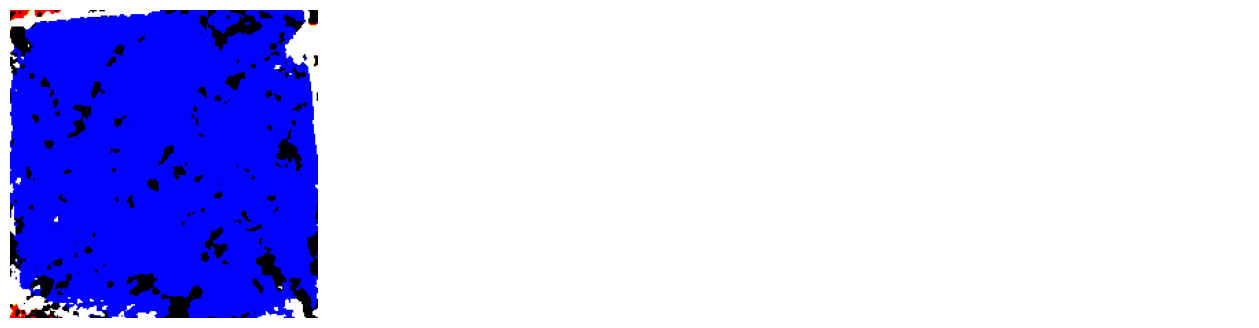

In [38]:
# visualize channel 586 of layer 'mixed4'

obj = objectives.Channel(model, 'conv1_conv', 3)
_ = render.render_vis(obj, 224)

In [62]:
inception_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))


In [58]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Model
num_classes = 10  # Replace with the number of classes in your dataset

# Remove the existing top layers
inception_model.layers.pop()
inception_model.layers.pop()

# Add new top layers for your classification task
output = inception_model.layers[-1].output
output = Dense(num_classes, activation='softmax')(output)

# Create a new model with your custom top layers
custom_inception_model = Model(inputs=inception_model.input, outputs=output)


In [59]:
custom_inception_model.summary()

Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_6 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_6[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                            

In [60]:
custom_inception_model.compile(loss='categorical_crossentropy',
                     optimizer=tf.keras.optimizers.Adam(),
                     metrics=['accuracy'])
custom_inception_model_trained = custom_inception_model.fit(train_data, 
                        epochs=1,
                        validation_data=test_data)

ValueError: in user code:

    File "c:\Users\niels\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1284, in train_function  *
        return step_function(self, iterator)
    File "c:\Users\niels\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1268, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\niels\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1249, in run_step  **
        outputs = model.train_step(data)
    File "c:\Users\niels\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1051, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "c:\Users\niels\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1109, in compute_loss
        return self.compiled_loss(
    File "c:\Users\niels\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\compile_utils.py", line 265, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "c:\Users\niels\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\losses.py", line 142, in __call__
        losses = call_fn(y_true, y_pred)
    File "c:\Users\niels\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\losses.py", line 268, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "c:\Users\niels\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\losses.py", line 1984, in categorical_crossentropy
        return backend.categorical_crossentropy(
    File "c:\Users\niels\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\backend.py", line 5559, in categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)

    ValueError: Shapes (None, None) and (None, None, None, 10) are incompatible


In [63]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Model

# Load the pre-trained ResNet50 model
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Remove the existing top layers
x = base_model.output
x = Dense(num_classes, activation='softmax')(x)

# Create a new model with your custom top layers
custom_model = Model(inputs=base_model.input, outputs=x)

# Freeze the weights of the base model
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
custom_model.compile(loss='categorical_crossentropy',
                     optimizer='adam',
                     metrics=['accuracy'])

# Train the model
custom_model.fit(train_data,
                 epochs=1,
                 validation_data=test_data)


ValueError: in user code:

    File "c:\Users\niels\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1284, in train_function  *
        return step_function(self, iterator)
    File "c:\Users\niels\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1268, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\niels\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1249, in run_step  **
        outputs = model.train_step(data)
    File "c:\Users\niels\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1051, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "c:\Users\niels\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1109, in compute_loss
        return self.compiled_loss(
    File "c:\Users\niels\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\compile_utils.py", line 265, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "c:\Users\niels\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\losses.py", line 142, in __call__
        losses = call_fn(y_true, y_pred)
    File "c:\Users\niels\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\losses.py", line 268, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "c:\Users\niels\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\losses.py", line 1984, in categorical_crossentropy
        return backend.categorical_crossentropy(
    File "c:\Users\niels\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\backend.py", line 5559, in categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)

    ValueError: Shapes (None, None) and (None, None, None, 10) are incompatible
